<img src="https://github.com/Kesterchia/Optimizing-UFC-Betting-Odds-Capstone/blob/main/Pictures/Fight-image.jpg?raw=True" width="500" height="500"> 

# Source:
https://www.kaggle.com/mdabbert/ultimate-ufc-dataset?select=ufc-master.csv

## Context:

This dataset is a merger of a few datasets on Ultimate Fighting Championship (UFC) fights on Kaggle, compiled by Kaggle user Mdabbert (https://www.kaggle.com/mdabbert).

## Content:

This dataset includes:

Rajeev Warrier's excellent dataset (https://www.kaggle.com/rajeevw/ufcdata). This dataset makes up much of the data. It contains data for every UFC bout. The 'red fighter' and 'blue fighter' are improperly recorded prior to around 2010, so that data has been excluded.

Mdabbert's odds dataset (https://www.kaggle.com/mdabbert/ufc-fights-2010-2020-with-betting-odds). This contains gambling odds for each fight.

Mart Jürisoo's Rankings dataset (https://www.kaggle.com/martj42/ufc-rankings). Includes a history of UFC fighter rankings. 

There are 108 columns of data.

## Column descriptions:
R_fighter, B_fighter: Fighter names

R_odds, B_odds: The American odds that the fighter will win. Usually scraped from bestfightodds.com

R_ev, B_ev: The profit on a 100 credit winning bet

date: The date of the fight

location: The location of the fight

country: The country the fight occurs in

Winner: The winner of the fight [Red, Blue, or Draw]

title_bout: Was this a title bout?

weight_class: The weight class of the bout

gender: Gender of the combatants

no_of_rounds: The number of rounds in the fight

B_current_lose_streak, R_current_lose_streak: Current losing streak

B_current_win_streak, R_current_win_streak: Current winning streak

B_draw, R_draw: Number of draws

B_avg_SIG_STR_landed, R_avg_SIG_STR_landed : Significant Strikes Landed per minute

B_avg_SIG_STR_pct, R_avg_SIG_STR_pct: Significant Striking Accuracy

B_avg_SUB_ATT, R_avg_SUB_ATT: Average Submissions Attempted per 15 Minutes

B_avg_TD_landed, R_avg_TD_landed: Average takedowns landed per 15 minutes

B_avg_TD_pct, R_avg_TD_pct: Takedown accuracy

B_longest_win_streak, R_longest_win_streak: Longest winning streak

B_losses, R_losses: Total number of losses

B_total_rounds_fought, R_total_rounds_fought: Total rounds fought

B_total_title_bouts, R_total_title_bouts: Total number of title bouts

B_win_by_Decision_Majority, R_win_by_Decision_Majority: Wins by Majority Decision

B_win_by_Decision_Split, R_win_by_Decision_Split: Wins by Split Decision

B_win_by_Decision_Unanimous, R_win_by_Decision_Unanimous: Wins by Unanimous Decision

B_win_by_KO/TKO, R_win_by_KO/TKO: Wins by KO/TKO

B_win_by_Submission, R_win_by_Submission: Wins by Submission

B_win_by_TKO_Doctor_Stoppage, R_win_by_TKO_Doctor_Stoppage: Wins by Doctor Stoppage

B_wins, R_wins: Total career wins

B_Stance, R_stance: Fighter stance

B_Height_cms, R_Height_cms: Fighter height in cms

B_Reach_cms, R_Reach_cms: Fighter reach in cms

B_Weight_lbs, R_Weight_lbs: Fighter weight in pounds

B_age, R_age: Fighter age

lose_streak_dif: (Blue lose streak) - (Red lose streak) winstreakdif: (Blue win streak) - (Red win streak)

longest_win_streak_dif: (Blue longest win streak) - (Red longest win streak)

win_dif: (Blue wins) - (Red wins)

loss_dif: (Blue losses) - (Red losses)

total_round_dif: (Blue total rounds fought) - (Red total rounds fought)

total_title_bout_dif: (Blue number of title fights) - (Red number of title fights)

ko_dif: (Blue wins by KO/TKO) - (Red wins by KO/TKO)

sub_dif: (Blue wins by submission) - (Red wins by submission)

height_dif: (Blue height) - (Red height) in cms

reach_dif: (Blue reach) - (Red reach) in cms

age_dif: (Blue age) - (Red age)

sig_str_dif: (Blue sig strikes per minute) - (Red sig strikes per minute)

avg_sub_att_dif: (Blue submission attempts) - (Red submission attempts)

avg_td_dif: (Blue TD attempts) - (Red TD attempts)

empty_arena: Did this fight occur in an empty arena? (1,0)

constant_1: The number 1

B_match_weightclass_rank, R_match_weightclass_rank: Rank in the weightclass this bout takes place in

R_Women's Flyweight_rank, B_Women's Flyweight_rank: Rank in the Women's Flyweight Division

B_Women's Featherweight_rank, 'RWomen's Featherweightrank: Rank in the Women's Featherweight Division BWomen's 
Strawweightrank, 'R_Women's Strawweight_rank: Rank in the Women's Strawweight Division

B_Women's Bantamweight_rank, R_Women's Bantamweight_rank: Rank in the Women's Bantamweight Division

B_Heavyweight_rank, R_Heavyweight_rank: Heavyweight rank

B_Light Heavyweight_rank, R_Light Heavyweight rank: Light Heavyweight rank

B_Middleweight_rank, R_Middleweight_rank: Middleweight rank

B_Welterweight_rank, R_Welterweight_rank: Welterweight rank

B_Lightweight_rank, R_Lightweight_rank: Lightweight rank

B_Featherweight_rank, R_Featherweight_rank: Featherweight rank

B_Bantamweight_rank, R_Bantamweight_rank: Bantamweight rank

B_Flyweight_rank, R_Flyweight_rank: Flyweight rank

B_Pound-for-Pound_rank, R_Pound-for-Pound_rank: Pound-for-Pound rank

better_rank: Who has the better rank (Red, Blue, neither)

finish: How the fight finished

finish_details: More details about the finish if available.

finish_round: The round the fight ended

finish_round_time: Time in the round of the finish

total_fight_time_secs: Total time of the fight in seconds

# 1: Importing libraries and dataset

In [377]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import os
from joblib import dump,load
import pickle
import json

from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

import tensorflow as tf
import keras
import kerastuner as kt
from tensorflow.python.client import device_lib

from keras.layers import Dense, Dropout, Flatten
from keras import Sequential
from keras import Input
from keras.optimizers import Adam


In [27]:
#Import in the dataset
df = pd.read_csv('./Data/ufc-master.csv')

df.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,R_td_attempted_bout,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout
0,Deiveson Figueiredo,Alex Perez,-286,225,34.965035,225.000000,11/21/2020,"Las Vegas, Nevada, USA",USA,Red,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Valentina Shevchenko,Jennifer Maia,-1667,850,5.998800,850.000000,11/21/2020,"Las Vegas, Nevada, USA",USA,Red,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mike Perry,Tim Means,-150,120,66.666667,120.000000,11/21/2020,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Katlyn Chookagian,Cynthia Calvillo,205,-265,205.000000,37.735849,11/21/2020,"Las Vegas, Nevada, USA",USA,Red,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mauricio Rua,Paul Craig,150,-190,150.000000,52.631579,11/21/2020,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3: Exploratory Data Analysis/ Visualization

Here we do some quick EDA to see basic patterns, but nothing too fancy.

### Checking for balance of target variable:

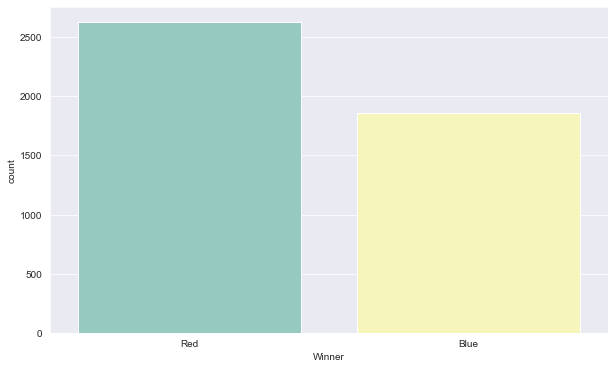

In [28]:
sns.set_style(style = 'darkgrid')
plt.figure(figsize = (10,6))

fig = sns.countplot(df['Winner'], palette = 'Set3')

Data is pretty balanced with both red and blue wins.

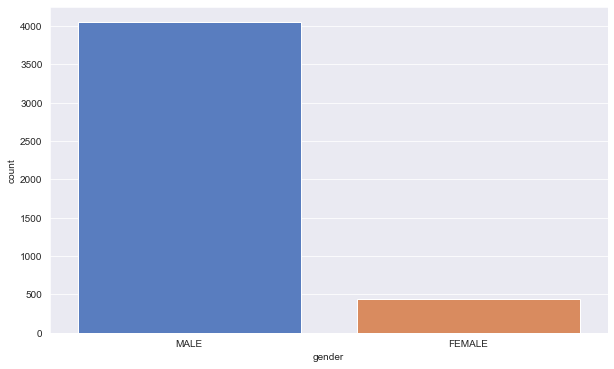

In [29]:
plt.figure(figsize = (10,6))
fig = sns.countplot(df['gender'], palette = 'muted')

Data is very imbalanced in gender, which is expected since MMA is male-dominated. However styles of fighting don't differ significantly between genders, so model predictions should not be too affected by the imbalance.

# 2: Data cleaning and preprocessing:

In [30]:
#See some quick info:
df.info(max_cols = 200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4485 entries, 0 to 4484
Data columns (total 137 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   R_fighter                     4485 non-null   object 
 1   B_fighter                     4485 non-null   object 
 2   R_odds                        4485 non-null   int64  
 3   B_odds                        4485 non-null   int64  
 4   R_ev                          4485 non-null   float64
 5   B_ev                          4485 non-null   float64
 6   date                          4485 non-null   object 
 7   location                      4485 non-null   object 
 8   country                       4485 non-null   object 
 9   Winner                        4485 non-null   object 
 10  title_bout                    4485 non-null   bool   
 11  weight_class                  4485 non-null   object 
 12  gender                        4485 non-null   object 
 13  no

The columns such as 'B_Women's Flyweight_rank', 'B_Women's Strawweight_rank' are irrelevant, as we already have the weight class and respective fighter rank as columns of their own. Therefore these columns will be dropped.



In [31]:
df = df.drop(labels = df.columns[81:107],
             axis = 1)

#Remaining data:
df.info(max_cols = 150)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4485 entries, 0 to 4484
Data columns (total 111 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   R_fighter                     4485 non-null   object 
 1   B_fighter                     4485 non-null   object 
 2   R_odds                        4485 non-null   int64  
 3   B_odds                        4485 non-null   int64  
 4   R_ev                          4485 non-null   float64
 5   B_ev                          4485 non-null   float64
 6   date                          4485 non-null   object 
 7   location                      4485 non-null   object 
 8   country                       4485 non-null   object 
 9   Winner                        4485 non-null   object 
 10  title_bout                    4485 non-null   bool   
 11  weight_class                  4485 non-null   object 
 12  gender                        4485 non-null   object 
 13  no

Now we store our variables in X and y:

In [32]:
y = df['Winner'].copy()
X = df.drop(labels = 'Winner', axis = 1).copy()

#Split variables into numeric and categorical:

X_numeric = X.select_dtypes(exclude = 'object').copy()
X_cat = X.select_dtypes(include = 'object').copy()

## 2.1: Categorical variables

### Impute time-related variables in X_cat:

In [33]:
#Our finishing time in round is stored as an object, the wrong datatype:

X_cat.loc[:,'finish_round_time'] 

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
4480    0:44
4481    2:01
4482    0:47
4483    5:00
4484    5:00
Name: finish_round_time, Length: 4485, dtype: object

In [34]:
#First we have to convert it to hh:mm:ss format:

X_cat.loc[:,'finish_round_time'] = '00:0' + X_cat.loc[:,'finish_round_time']
X_cat.loc[:,'finish_round_time']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
4480    00:00:44
4481    00:02:01
4482    00:00:47
4483    00:05:00
4484    00:05:00
Name: finish_round_time, Length: 4485, dtype: object

In [35]:
#Now we can convert it to a timedelta object

X_cat.loc[:,'finish_round_time'] = pd.to_timedelta(X_cat.loc[:,'finish_round_time'])
X_cat.loc[:,'finish_round_time']

0           NaT
1           NaT
2           NaT
3           NaT
4           NaT
         ...   
4480   00:00:44
4481   00:02:01
4482   00:00:47
4483   00:05:00
4484   00:05:00
Name: finish_round_time, Length: 4485, dtype: timedelta64[ns]

In [36]:
#Finally we store it in seconds instead:

X_cat.loc[:,'finish_round_time'] = X_cat.loc[:,'finish_round_time'].dt.seconds
X_cat.loc[:,'finish_round_time'] #Note it becomes stored in float format

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
4480     44.0
4481    121.0
4482     47.0
4483    300.0
4484    300.0
Name: finish_round_time, Length: 4485, dtype: float64

Now we can impute the null values. Before that we should look at how it is distributed:

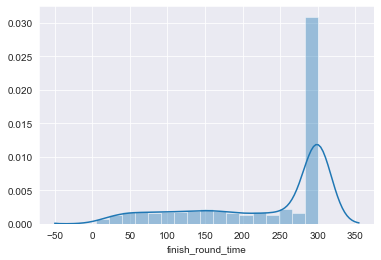

In [37]:
#Now we can impute the values. Before that we see how it is distributed:

sns.distplot(X_cat.loc[:,'finish_round_time'])

Since it's pretty skewed, we should use a robust measure to impute instead (the median). 

In [38]:
from sklearn.impute import SimpleImputer

simple_imputer = SimpleImputer(strategy = 'median')

#Impute values:
X_cat.loc[:,'finish_round_time'] = simple_imputer.fit_transform(X_cat[['finish_round_time']])

#Check for null values:
X_cat['finish_round_time'].isnull().sum()

0

Now we should move the variable to the X_numeric table instead:

In [39]:
#Move the column over:

X_numeric['finish_round_time'] = X_cat['finish_round_time']
X_cat = X_cat.drop('finish_round_time', axis = 1)

### Impute remaining categorical variables in X_cat:

In [40]:
#Check which columns still have null values:

X_cat.isnull().any()

R_fighter         False
B_fighter         False
date              False
location          False
country           False
weight_class      False
gender            False
B_Stance          False
R_Stance          False
better_rank       False
finish             True
finish_details     True
dtype: bool

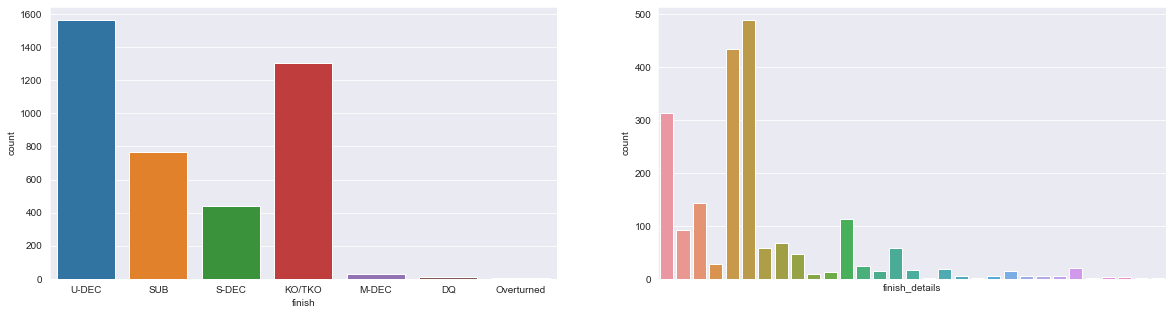

In [41]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

#Plot for 'finish':

sns.countplot(X_cat['finish'], ax = ax[0])

#Plot for 'finish_details'

sns.countplot(X_cat['finish_details'], ax = ax[1])
ax[1].tick_params(axis = 'x', labelbottom = False) #Hide the bottom labels so it doesn't look too messy

Using the mode to impute the missing values doesn't seem like an appropriate approach for these two variables, especially 'finish_details'. Therefore we will be conservative and just leave the missing values as they are:

In [42]:
#Fill in the null values with a simple 'Missing' string:
X_cat.loc[:,'finish'] = X_cat['finish'].fillna(value = 'Missing')
X_cat.loc[:,'finish_details'] = X_cat['finish_details'].fillna(value = 'Missing')

#Ensure there are no remaining null values:
X_cat.isnull().sum()

#Rename the imputed dataframe for clarity:
X_cat_imputed = X_cat

In [43]:
X_cat_imputed.head()

,R_fighter,B_fighter,date,location,country,weight_class,gender,B_Stance,R_Stance,better_rank,finish,finish_details
0,Deiveson Figueiredo,Alex Perez,11/21/2020,"Las Vegas, Nevada, USA",USA,Flyweight,MALE,Orthodox,Orthodox,Red,Missing,Missing
1,Valentina Shevchenko,Jennifer Maia,11/21/2020,"Las Vegas, Nevada, USA",USA,Women's Flyweight,FEMALE,Orthodox,Southpaw,Red,Missing,Missing
2,Mike Perry,Tim Means,11/21/2020,"Las Vegas, Nevada, USA",USA,Welterweight,MALE,Orthodox,Orthodox,neither,Missing,Missing
3,Katlyn Chookagian,Cynthia Calvillo,11/21/2020,"Las Vegas, Nevada, USA",USA,Women's Flyweight,FEMALE,Orthodox,Orthodox,Red,Missing,Missing
4,Mauricio Rua,Paul Craig,11/21/2020,"Las Vegas, Nevada, USA",USA,Light Heavyweight,MALE,Orthodox,Orthodox,Red,Missing,Missing


### Encoding categorical variables:

In [44]:
X_cat_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4485 entries, 0 to 4484
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   R_fighter       4485 non-null   object
 1   B_fighter       4485 non-null   object
 2   date            4485 non-null   object
 3   location        4485 non-null   object
 4   country         4485 non-null   object
 5   weight_class    4485 non-null   object
 6   gender          4485 non-null   object
 7   B_Stance        4485 non-null   object
 8   R_Stance        4485 non-null   object
 9   better_rank     4485 non-null   object
 10  finish          4485 non-null   object
 11  finish_details  4485 non-null   object
dtypes: object(12)
memory usage: 420.6+ KB


First we drop the columns that we are fairly certain have no impact on winning outcome:

In [45]:
#Drop fighter names and fight dates:

X_cat_imputed = X_cat_imputed.drop(['R_fighter','B_fighter','date'], axis = 1)

#Check our columns again:

X_cat_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4485 entries, 0 to 4484
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   location        4485 non-null   object
 1   country         4485 non-null   object
 2   weight_class    4485 non-null   object
 3   gender          4485 non-null   object
 4   B_Stance        4485 non-null   object
 5   R_Stance        4485 non-null   object
 6   better_rank     4485 non-null   object
 7   finish          4485 non-null   object
 8   finish_details  4485 non-null   object
dtypes: object(9)
memory usage: 315.5+ KB


To prevent ending up with a high dimensional dataframe (if one-hot encoding was used), the choice here will be binary encoding. The categories are numerically encoded, converted to binary form and finally expressed through separate columns.

In [101]:
from category_encoders.binary import BinaryEncoder
binary_encoder = BinaryEncoder().fit(X_cat_imputed)
X_cat_imputed_encoded = binary_encoder.transform(X_cat_imputed)

#View the encoded table:
X_cat_imputed_encoded.head()

,location_0,location_1,location_2,location_3,location_4,location_5,location_6,location_7,location_8,country_0,...,finish_0,finish_1,finish_2,finish_3,finish_details_0,finish_details_1,finish_details_2,finish_details_3,finish_details_4,finish_details_5
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


## 2.2: Numerical variables

### Impute numerical variables in X_numeric:

Check how many columns have null values:

In [47]:
nullcols = df.columns[df.isnull().any(axis=0)]

print('No. of columns with null values:',len(nullcols))

No. of columns with null values: 41


There are too many columns to have a different imputing strategy for each, so we will use sklearn's iterative imputer to impute the missing values. It goes through each column and returns predictions for missing values based on all other columns. After going through all variables, it repeats the cycle for a number of iterations.

The default strategy for the iterative imputer is to use a Bayesian Ridge Regression, an alternative to OLS.

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer

In [48]:
%%time
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(estimator = None, #Default bayesian ridge
                           max_iter = 100)

#Impute values:
X_numeric_imputed = pd.DataFrame(data = imputer.fit_transform(X_numeric),
                                 columns = X_numeric.columns)

Wall time: 4min 36s


D:\Tools\Anaconda\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


### Scale the numerical variables:

In [49]:
X_numeric_imputed.shape

(4485, 98)

In [50]:
#Initialize an iterator:
import itertools

iterator = itertools.product(range(10), range(10))

D:\Tools\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Tools\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Tools\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Tools\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Tools\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Tools\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping dens

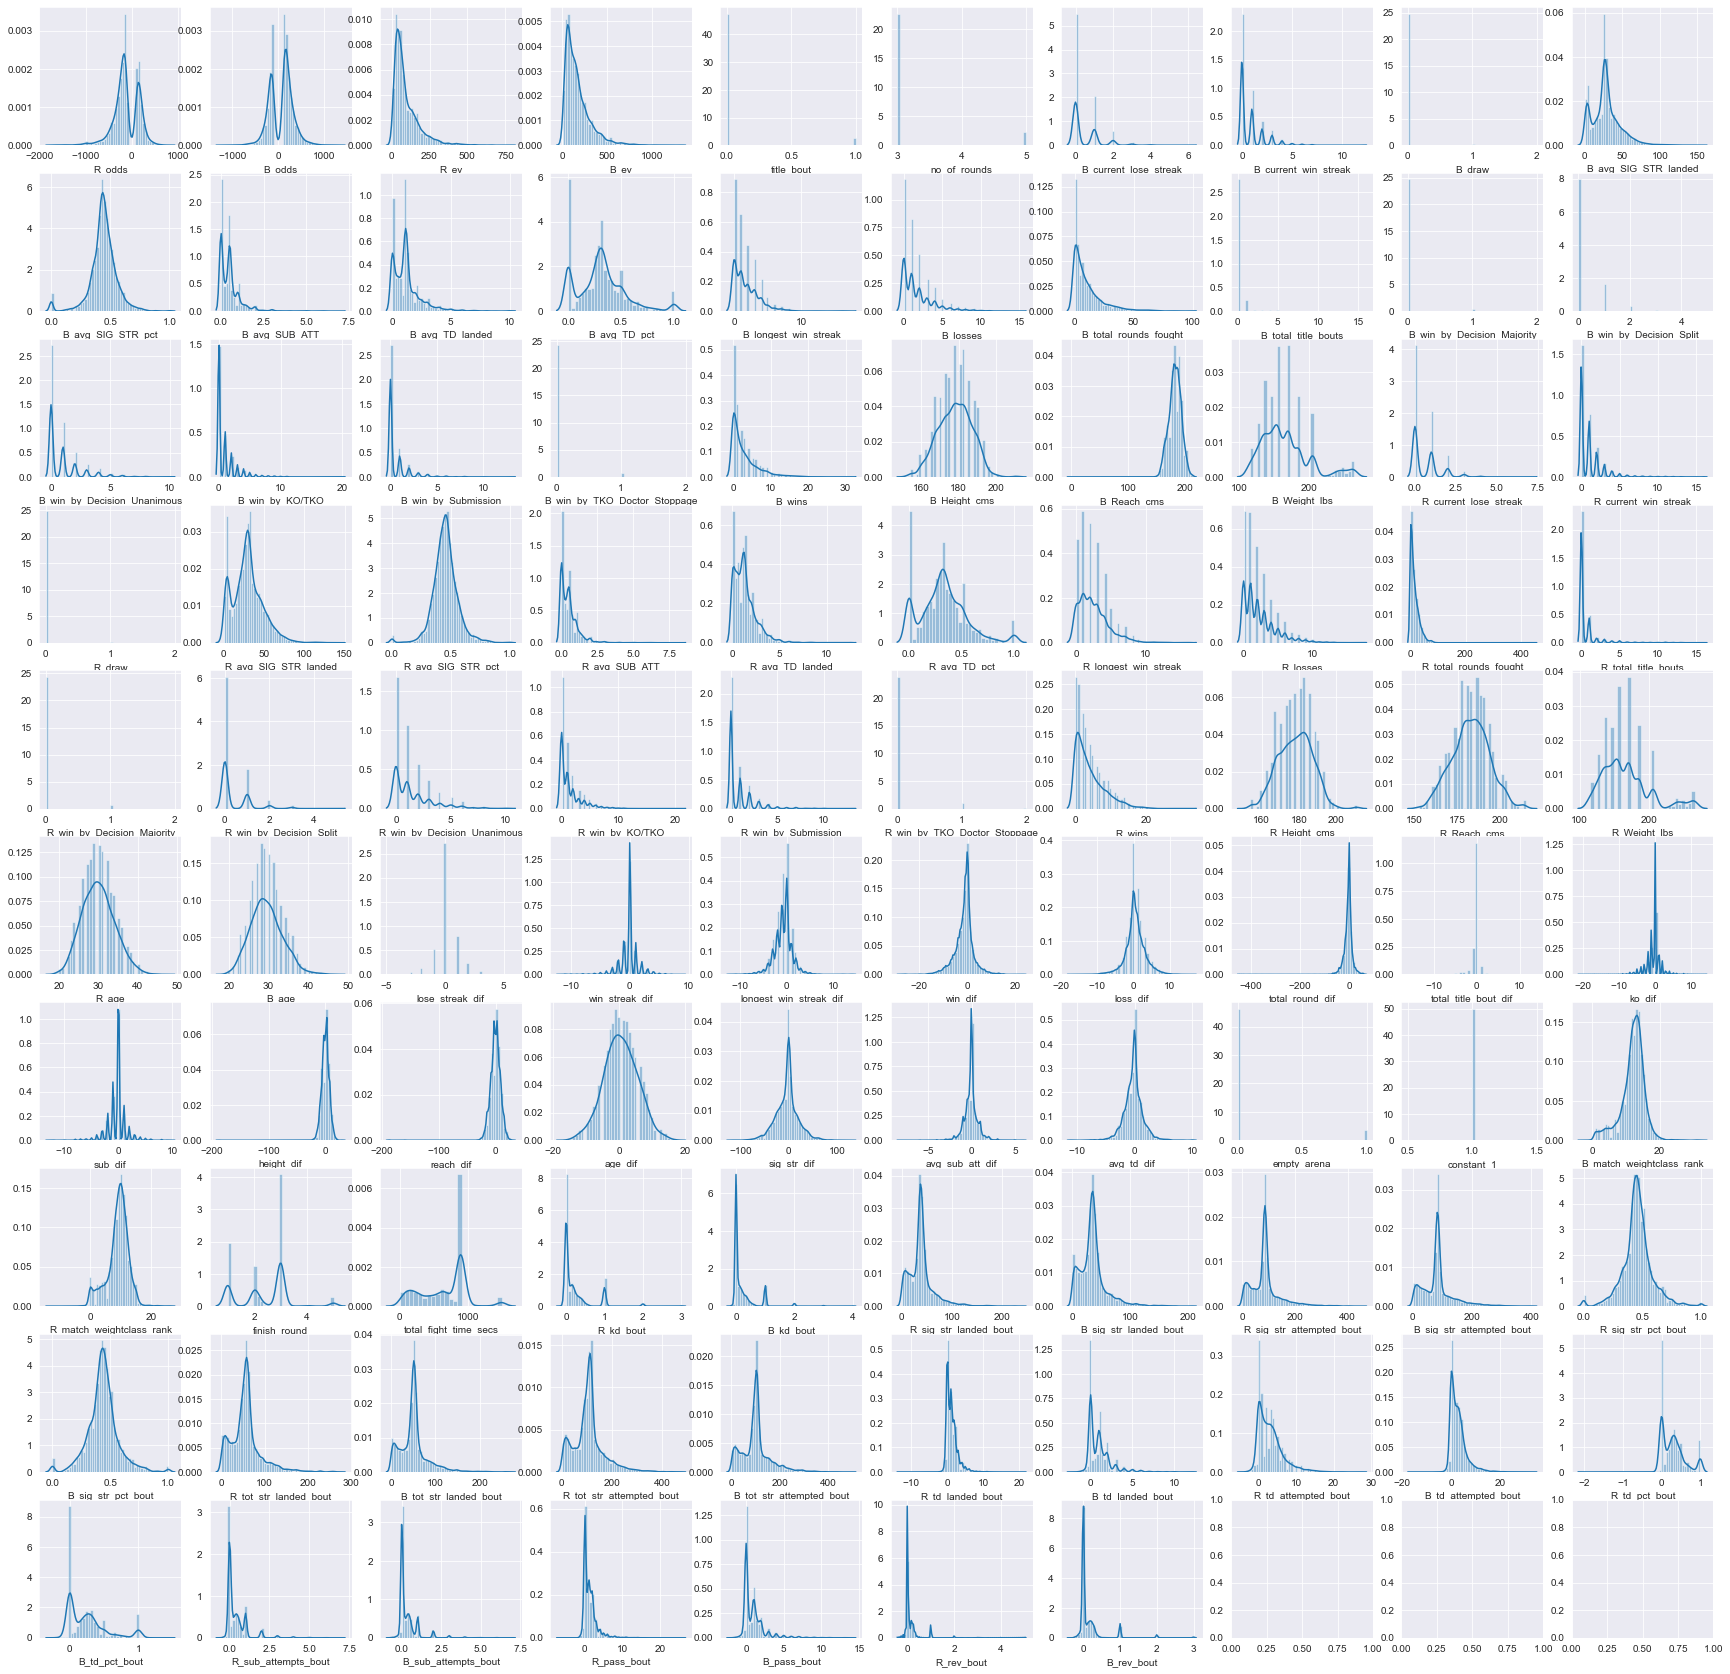

In [51]:
#Before scaling we first check the distribution of the variables:

fig, ax = plt.subplots(nrows = 10,
                       ncols = 10,
                      figsize = (30,30))


for i in range(97):
    axis = next(iterator)
    sns.distplot(X_numeric_imputed.iloc[:,i],
                 ax = ax[axis[0]][axis[1]]
                )

Alot of the data definitely seems skewed, so we will use a robust scaler instead of the standard scaler. This just means more robust measures like medians/inter-quartile ranges will be used instead of the typical mean/standard deviation.

In [52]:
from sklearn.preprocessing import RobustScaler

robustscaler = RobustScaler()

#Scale the data:
X_numeric_imputed_scaled = pd.DataFrame(robustscaler.fit_transform(X_numeric_imputed),
                                        columns = X_numeric.columns)

#Check a few rows of the scaled data:
X_numeric_imputed_scaled.head()

,R_odds,B_odds,R_ev,B_ev,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,...,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout,finish_round_time
0,-0.348718,0.256757,-0.346320,0.608840,0.0,2.0,0.0,3.0,0.0,-1.083819,...,0.520892,0.384757,0.069578,1.242531,0.276176,0.115162,0.276789,0.465076,1.920559,0.0
1,-3.889744,1.945946,-0.662758,4.614365,0.0,0.0,0.0,1.0,0.0,-1.114234,...,-0.333999,0.262596,-0.545156,0.155835,-0.480948,0.615509,-0.855204,-0.045141,0.708929,0.0
2,0.000000,-0.027027,0.000000,-0.064088,0.0,0.0,0.0,1.0,0.0,-1.071653,...,0.048383,-0.026220,-0.160840,0.183168,0.455213,-0.010214,0.004867,1.109659,0.056151,0.0
3,0.910256,-1.067568,1.511204,-0.591306,0.0,0.0,0.0,3.0,1.0,-1.107644,...,0.613056,-0.271043,0.261625,0.511729,0.198860,-0.200146,0.170346,0.906949,0.673673,0.0
4,0.769231,-0.864865,0.910364,-0.495842,0.0,0.0,0.0,2.0,1.0,-1.204464,...,0.828344,-0.427459,0.588343,-0.527732,3.236191,-0.493768,1.982333,2.547966,1.731762,0.0


## Dummy encode the target variable:

In [53]:
#Convert to dummy variables:

pd.get_dummies(y).head()

,Blue,Red
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0


In [54]:
#We only need to keep one for the analysis:

y = pd.get_dummies(y)['Red']

#Rename column for clarity:

y = y.rename('Red_winner')

### Rejoin our numerical and categorical dataframes:

In [55]:
clean_df = pd.concat([X_cat_imputed_encoded, X_numeric_imputed_scaled], axis = 1, join = 'inner')

print('Merged dataframe shape:',clean_df.shape)
print('Columns with null values:',clean_df.isnull().any().sum())

Merged dataframe shape: (4485, 140)
Columns with null values: 0


In [56]:
#See a few rows of our cleaned and scaled data:

clean_df.head()

,location_0,location_1,location_2,location_3,location_4,location_5,location_6,location_7,location_8,country_0,...,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout,finish_round_time
0,0,0,0,0,0,0,0,0,1,0,...,0.520892,0.384757,0.069578,1.242531,0.276176,0.115162,0.276789,0.465076,1.920559,0.0
1,0,0,0,0,0,0,0,0,1,0,...,-0.333999,0.262596,-0.545156,0.155835,-0.480948,0.615509,-0.855204,-0.045141,0.708929,0.0
2,0,0,0,0,0,0,0,0,1,0,...,0.048383,-0.026220,-0.160840,0.183168,0.455213,-0.010214,0.004867,1.109659,0.056151,0.0
3,0,0,0,0,0,0,0,0,1,0,...,0.613056,-0.271043,0.261625,0.511729,0.198860,-0.200146,0.170346,0.906949,0.673673,0.0
4,0,0,0,0,0,0,0,0,1,0,...,0.828344,-0.427459,0.588343,-0.527732,3.236191,-0.493768,1.982333,2.547966,1.731762,0.0


# 4: Feature selection

#### Principal component analysis:

PCA is chosen as the main feature selection choice here instead of other methods like Recursive Feature elimination as many variables here are likely highly correlated (eg. strikes landed per round and strikes attempted per round).

PCA can remove some of that multicollinearity, and maybe after that an RFE can be implemented.

In [57]:
from sklearn.decomposition import PCA

pca = PCA(n_components = None) #Default setting keeps all components

#Fit the PCA transformer
pca.fit(clean_df)

pca_df = pd.DataFrame(pca.transform(clean_df), 
                      columns = ['Component {}'.format(i+1) for i in range(len(clean_df.columns))])

#Take a look at the transformed data:
pca_df.head()

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10,...,Component 131,Component 132,Component 133,Component 134,Component 135,Component 136,Component 137,Component 138,Component 139,Component 140
0,3.365957,1.449649,1.421770,3.002781,1.249512,-2.155030,0.124297,1.883992,-1.067521,-2.256348,...,-8.956326e-17,-3.917651e-16,-3.687254e-16,-1.688612e-16,9.423894e-17,1.431241e-16,-6.873832e-16,-3.733431e-16,-2.110291e-16,1.728110e-16
1,5.711048,4.117339,-1.209530,1.459259,6.969505,-3.643665,1.615600,1.489362,-0.128660,0.080895,...,1.698148e-17,-4.518459e-16,-4.717054e-16,5.721480e-17,1.156360e-16,1.955851e-16,3.445811e-16,-8.280132e-17,-1.239424e-15,3.949803e-17
2,2.402121,0.120708,6.335492,0.465243,-3.375790,-0.031264,-0.120813,-2.504279,0.297882,-0.333683,...,3.517466e-16,6.627457e-17,3.820375e-16,-3.685489e-16,-1.416928e-16,1.014308e-16,-4.366436e-16,-1.138308e-17,-1.263616e-16,1.095550e-15
3,1.631808,-0.301112,1.759227,-0.024083,-4.761303,-2.150389,2.218187,2.802446,-1.049526,-2.045990,...,7.041853e-16,-1.282337e-15,-1.327515e-16,-1.522967e-16,-7.693382e-17,4.141007e-16,3.424601e-17,-1.936637e-17,-1.016399e-16,3.632785e-16
4,7.691667,10.474891,-11.964110,1.353973,-8.751643,-12.917117,-4.884484,-6.328906,3.612306,-3.197965,...,4.148170e-15,-1.361903e-15,-1.790277e-15,9.602340e-16,5.305661e-16,-2.280536e-15,3.602078e-16,-1.221865e-16,6.084716e-16,-1.610328e-15


We are able to view how much variance each Principle Component explains in the data:

In [58]:
#See the explained ratio for the first 5 components:

pca.explained_variance_ratio_[:5]

array([0.10548463, 0.09423553, 0.08748491, 0.06047549, 0.05535352])

In [59]:
#Create a function to decide how many components to keep:


def keep_components(array, variance):
    n = 1
    while sum(array[:n]) < variance:
        n += 1
    print('{} out of {} components should be kept to explain {} variance'.format(n,len(array),variance))
    

In [60]:
#In this analysis we choose to retain enough variables to explain 95% variance:
keep_components(pca.explained_variance_ratio_, 0.95)

56 out of 140 components should be kept to explain 0.95 variance


In [61]:
#Therefore we keep 56 components:

pca = PCA(n_components = 56)

pca_df = pd.DataFrame(pca.fit_transform(clean_df), 
                      columns = ['Component {}'.format(i+1) for i in range(pca.n_components)])

### Recursive Feature elimination:

In RFE, we use an estimator that assigns class weights (eg. Regression) and 'prune' away variables that have the lowest importance relative to the target.

In this case the estimator we use is a support vector machine, and we prune it from 56 components down to 30. The number 30 is an arbitrary choice. If our model performs poorly later, we can consider pruning less variables.

In [62]:
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

svc = SVC(kernel = 'linear') #The linear kernel gives feature importances, unlike the rbf kernel

rfe = RFE(estimator = LinearRegression(),
          n_features_to_select = 30,
          step = 1)

rfe.fit(pca_df, y)

#See how they rank each component according to how much variance in y they explain:
rfe.ranking_

array([21, 22,  1, 10,  1,  1,  1,  1,  1,  1,  1,  1,  1, 11, 20,  1, 25,
        1, 14,  7, 27,  1,  1, 17,  1,  6,  1, 23, 15,  8, 12, 18,  1,  1,
       19,  3,  1,  9, 24,  1,  1, 13,  1,  1,  1,  1,  1, 16,  5,  1,  1,
        4,  1,  1,  2, 26])

The results are strange! The first few components that explain the most variance are actually ranked poorly by the RFE estimator. We will try fitting ML models on both the normal PCA data and also PCA data pruned by RFE and see which gives us better results.

In [63]:
#Transform our data:

rfe_df = pd.DataFrame(rfe.transform(pca_df))

#Double check the shapes of both our datasets:

print('Shape of dataframe after PCA:', pca_df.shape)
print('Shape of dataframe after PCA and RFE:', rfe_df.shape)

Shape of dataframe after PCA: (4485, 56)
Shape of dataframe after PCA and RFE: (4485, 30)


# 3: Implementing models!

First we split our models into training and testing data:

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(pca_df, y, test_size=0.33, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(pca_df,y,test_size = 0.5, random_state = 42)

Implement all kinds of models to try to predict winners!

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier

### 3.1: Simple ML models

### Baseline Dummy Classifier:

In [66]:
#Create a dummy model and generate predictions:

dummymodel = DummyClassifier(strategy = 'stratified') #Predicts based on class distribution

dummymodel.fit(X_train,y_train)
dummymodel_predictions = dummymodel.predict(X_test)

### Logistic Regression:

In [67]:
'''
#Use GridSearch to look for a good set of parameters:

logmodel = GridSearchCV(estimator = LogisticRegression(penalty = 'l2'), #Ridge regression so we don't eliminate coefficients
                        param_grid = {'C' : [0.01,0.1,1.0], #Regularization parameter
                                      'solver': ['newton-cg','lbfgs','liblinear']
                                     }
                       )
#Fit model and store predictions:

logmodel.fit(X_train,y_train)
logmodel_predictions = logmodel.predict(X_test)

#Save model
dump(logmodel,'./Models/logmodel.joblib')
'''

#Load model
logmodel = load('./Models/logmodel.joblib')
logmodel_predictions = logmodel.predict(X_test)                

### Support vector machines:

In [68]:
'''
svcmodel = GridSearchCV(estimator = SVC(),
                        param_grid = {'kernel': ['linear','poly','rbf'],
                                      'C': [0.01,0.1,1.0]
                                     }
                       )
svcmodel.fit(X_train,y_train)
svcmodel_predictions = svcmodel.predict(X_test)
''''''
#Save model
dump(forestmodel,'./Models/forestmodel.joblib')
'''

#Load model
svcmodel = load('./Models/svcmodel.joblib')
svcmodel_predictions = svcmodel.predict(X_test)

### Random forest:

In [69]:
'''
from sklearn.ensemble import RandomForestClassifier

forestmodel = GridSearchCV(estimator = RandomForestClassifier(),
                         param_grid = {'n_estimators': [100,200,400,800],
                                       'max_depth': [None], #Don't set limit for tree depth
                                      }
                        )

forestmodel.fit(X_train,y_train)
forestmodel_predictions = forestmodel.predict(X_test)

#Save model
dump(forestmodel,'./Models/forestmodel.joblib')
'''

#Load model
forestmodel = load('./Models/forestmodel.joblib')
forestmodel_predictions = forestmodel.predict(X_test)                   

### K-Nearest Neighbors:

In [70]:
'''
from sklearn.neighbors import KNeighborsClassifier

knnmodel = GridSearchCV(estimator = KNeighborsClassifier(),
                        param_grid = {'n_neighbors':[5,10,20,40], #Neighbors to consider when classifying point
                                      'weights':['uniform','distance'], #Constant weights vs. Inverse of distance
                                      'algorithm':['auto']
                                     }
                       )

knnmodel.fit(X_train, y_train)
knnmodel_predictions = knnmodel.predict(X_test)

#Save model
dump(stackedmodel,'./Models/stackedmodel.joblib')
'''

#Load model
knnmodel = load('./Models/knnmodel.joblib')
knnmodel_predictions = knnmodel.predict(X_test)

### 3.2: Stacking models:



In [71]:
'''
from sklearn.ensemble import StackingClassifier

stackedmodel = StackingClassifier(estimators = [('KNN',knnmodel),
                                                ('Rforest',forestmodel),
                                                ('SVC',svcmodel),
                                                ('LogR',logmodel)
                                               ],
                                  final_estimator = LogisticRegression() #Linear model is probably good idea here
                                 )
stackedmodel.fit(X_train,y_train)
stackedmodel_predictions = stackedmodel.predict(X_test)

#Save model
dump(stackedmodel,'./Models/stackedmodel.joblib')
'''

#Load model
stackedmodel = load('./Models/stackedmodel.joblib')
stackedmodel_predictions = stackedmodel.predict(X_test)

### 3.3: Neural networks:

### Check we're using a GPU for training:

In [72]:
from tensorflow.python.client import device_lib

print('Making sure GPU is available:')
print("GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print('GPU Name:', tf.config.list_physical_devices('GPU'))

Making sure GPU is available:
GPUs Available:  0
GPU Name: []


In [73]:
#Define a function to build the model:

def model_builder(hp):
    model = Sequential()
    
    #Flatten input
    model.add(Flatten())
    
    #Choice of hyperparameters
    hp_units_layer1 = hp.Int('Layer1_units', min_value = 10, max_value = 500, step = 30 ) #Range of values for no. of units
    hp_units_layer2 = hp.Int('Layer2_units', min_value = 10, max_value = 500, step = 30 )
    hp_units_layer3 = hp.Int('Layer3_units', min_value = 10, max_value = 500, step = 30 )
    hp_learningrate = hp.Choice('Adam learning rate', values = [0.01,0.001,0.0001,0.00001,0.000001])
    
    #First dense layer
    model.add(Dense(units = hp_units_layer1, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)))
    model.add(Dropout(0.4))
    
    #Second dense layer
    model.add(Dense(units = hp_units_layer2, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)))
    model.add(Dropout(0.4))
    
    #Third dense layer
    model.add(Dense(units = hp_units_layer3, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)))
    model.add(Dropout(0.4))

    
    #Classification layer
    model.add(Dense(units = 1, activation = 'sigmoid'))
    
    #Compile model
    model.compile(optimizer = Adam(learning_rate = hp_learningrate),
                  loss = 'BinaryCrossentropy',
                  metrics = ['accuracy', 'AUC', 'Recall', 'Precision']
                 )
    return model

In [74]:
#Instantiate a tuner using the Hyperband algorithm:
#This algorithm quickly eliminates poor models and spends more time training promising models

'''
tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy',
                     max_epochs = 400,
                     directory = './Tuner',
                     project_name = 'UFC Tuner with validation',
                     hyperband_iterations = 10 #No. of full algorithm iterations it runs
                    )
'''

INFO:tensorflow:Reloading Oracle from existing project ./Tuner\UFC Tuner with validation\oracle.json
INFO:tensorflow:Reloading Tuner from ./Tuner\UFC Tuner with validation\tuner0.json


In [71]:
%%time
#Search for the best hyperparameters:

# tuner.search(X_train,y_train, epochs = 10, validation_data = (X_val,y_val))

Trial 1318 Complete [00h 00m 18s]
val_accuracy: 0.6565566658973694

Best val_accuracy So Far: 0.763603925704956
Total elapsed time: 03h 25m 13s

Search: Running Trial #1319

Hyperparameter    |Value             |Best Value So Far 
Layer1_units      |250               |310               
Layer2_units      |100               |40                
Layer3_units      |40                |10                
Adam learning rate|0.0001            |0.001             
tuner/epochs      |134               |15                
tuner/initial_e...|45                |5                 
tuner/bracket     |4                 |4                 
tuner/round       |3                 |1                 
tuner/trial_id    |b9c88b23023d3f4...|f1454d3c731c7be...

Epoch 46/134

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by def

KeyboardInterrupt: 

In [374]:
#Get the best parameters from the tuner

#best_parameters = tuner.get_best_hyperparameters(num_trials = 1)[0]

In [385]:
#Save dictionary to pickle file
'''
with open('./Models/Neural_network/tuner_best_params.pkl','wb') as file:
    pickle.dump(best_parameters,file)
'''

#Load dictionary from pickle file
with open('./Models/Neural_network/tuner_best_params.pkl','rb') as file:
    best_parameters = pickle.load(file)
    
#View the best parameters for our model:
best_parameters.values

{'Layer1_units': 310,
 'Layer2_units': 40,
 'Layer3_units': 10,
 'Adam learning rate': 0.001,
 'tuner/epochs': 15,
 'tuner/initial_epoch': 5,
 'tuner/bracket': 4,
 'tuner/round': 1,
 'tuner/trial_id': 'f1454d3c731c7be0820a489eb0f48420'}

In [107]:
#Build a model using the best parameters identified by the tuner

#tuned_neural_model = tuner.hypermodel.build(hp = best_parameters)

In [91]:
# Train the model: 

# History = tuned_neural_model.fit(X_train,y_train,epochs = 500, validation_data = (X_val,y_val), batch_size = 16)

Epoch 1/500

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

188/188 [==============================] - 2s 8ms/step - loss: 8.6932 - accuracy: 0.6348 - auc: 0.6671 - recall: 0.8301 - precision: 0.6489 - val_loss: 1.9070 - val_accuracy: 0.7190 - val_auc: 0.8220 - val_recall: 0.9467 - val_precision: 0.6927
Epoch 2/500
188/188 [==============================] - 1s 5ms/step - loss: 1.1498 - accuracy: 0.6212 - auc: 0.6961 - recall: 0.9701 - precision: 0.6131 - val_loss: 0.8526 - val_accuracy: 0.5937 - val_auc: 0.8129 - val_recall: 1.0000 - val_precision: 0

188/188 [==============================] - 1s 6ms/step - loss: 0.6783 - accuracy: 0.6921 - auc: 0.7408 - recall: 0.6558 - precision: 0.7867 - val_loss: 0.6313 - val_accuracy: 0.7690 - val_auc: 0.8412 - val_recall: 0.8422 - val_precision: 0.7845
Epoch 31/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6837 - accuracy: 0.6788 - auc: 0.7304 - recall: 0.6439 - precision: 0.7736 - val_loss: 0.6332 - val_accuracy: 0.7654 - val_auc: 0.8332 - val_recall: 0.8152 - val_precision: 0.7949
Epoch 32/500
188/188 [==============================] - 1s 6ms/step - loss: 0.6859 - accuracy: 0.6718 - auc: 0.7231 - recall: 0.6258 - precision: 0.7744 - val_loss: 0.6342 - val_accuracy: 0.7649 - val_auc: 0.8334 - val_recall: 0.8174 - val_precision: 0.7930
Epoch 33/500
188/188 [==============================] - 1s 6ms/step - loss: 0.6900 - accuracy: 0.6864 - auc: 0.7341 - recall: 0.6433 - precision: 0.7862 - val_loss: 0.6315 - val_accuracy: 0.7627 - val_auc: 0.8376 - val_recall: 0.8430 - val

Epoch 62/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6816 - accuracy: 0.6684 - auc: 0.7239 - recall: 0.6315 - precision: 0.7654 - val_loss: 0.6232 - val_accuracy: 0.7681 - val_auc: 0.8385 - val_recall: 0.8355 - val_precision: 0.7870
Epoch 63/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6802 - accuracy: 0.6708 - auc: 0.7247 - recall: 0.6337 - precision: 0.7676 - val_loss: 0.6197 - val_accuracy: 0.7663 - val_auc: 0.8376 - val_recall: 0.8295 - val_precision: 0.7880
Epoch 64/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6770 - accuracy: 0.6854 - auc: 0.7302 - recall: 0.6518 - precision: 0.7788 - val_loss: 0.6200 - val_accuracy: 0.7672 - val_auc: 0.8370 - val_recall: 0.8310 - val_precision: 0.7883
Epoch 65/500
188/188 [==============================] - 1s 6ms/step - loss: 0.6756 - accuracy: 0.6791 - auc: 0.7233 - recall: 0.6354 - precision: 0.7798 - val_loss: 0.6196 - val_accuracy: 0.7716 - val_auc: 0.8405 - val_recall:

Epoch 94/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6744 - accuracy: 0.6724 - auc: 0.7234 - recall: 0.6304 - precision: 0.7725 - val_loss: 0.6186 - val_accuracy: 0.7654 - val_auc: 0.8387 - val_recall: 0.8234 - val_precision: 0.7902
Epoch 95/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6689 - accuracy: 0.6868 - auc: 0.7369 - recall: 0.6242 - precision: 0.8009 - val_loss: 0.6142 - val_accuracy: 0.7725 - val_auc: 0.8438 - val_recall: 0.8310 - val_precision: 0.7951
Epoch 96/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6743 - accuracy: 0.6764 - auc: 0.7381 - recall: 0.6185 - precision: 0.7874 - val_loss: 0.6126 - val_accuracy: 0.7658 - val_auc: 0.8414 - val_recall: 0.8062 - val_precision: 0.8007
Epoch 97/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6704 - accuracy: 0.6794 - auc: 0.7354 - recall: 0.6349 - precision: 0.7807 - val_loss: 0.6131 - val_accuracy: 0.7685 - val_auc: 0.8387 - val_recall:

Epoch 126/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6719 - accuracy: 0.6781 - auc: 0.7269 - recall: 0.6179 - precision: 0.7906 - val_loss: 0.6143 - val_accuracy: 0.7721 - val_auc: 0.8355 - val_recall: 0.8062 - val_precision: 0.8092
Epoch 127/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6776 - accuracy: 0.6741 - auc: 0.7278 - recall: 0.6247 - precision: 0.7790 - val_loss: 0.6159 - val_accuracy: 0.7681 - val_auc: 0.8356 - val_recall: 0.8279 - val_precision: 0.7911
Epoch 128/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6778 - accuracy: 0.6728 - auc: 0.7239 - recall: 0.6242 - precision: 0.7772 - val_loss: 0.6198 - val_accuracy: 0.7649 - val_auc: 0.8315 - val_recall: 0.7941 - val_precision: 0.8069
Epoch 129/500
188/188 [==============================] - 1s 6ms/step - loss: 0.6744 - accuracy: 0.6761 - auc: 0.7289 - recall: 0.6174 - precision: 0.7876 - val_loss: 0.6182 - val_accuracy: 0.7640 - val_auc: 0.8338 - val_rec

Epoch 158/500
188/188 [==============================] - 1s 6ms/step - loss: 0.6691 - accuracy: 0.6711 - auc: 0.7322 - recall: 0.6383 - precision: 0.7652 - val_loss: 0.6076 - val_accuracy: 0.7721 - val_auc: 0.8358 - val_recall: 0.8114 - val_precision: 0.8060
Epoch 159/500
188/188 [==============================] - 1s 6ms/step - loss: 0.6675 - accuracy: 0.6814 - auc: 0.7375 - recall: 0.6490 - precision: 0.7744 - val_loss: 0.6071 - val_accuracy: 0.7667 - val_auc: 0.8387 - val_recall: 0.8257 - val_precision: 0.7906
Epoch 160/500
188/188 [==============================] - 1s 6ms/step - loss: 0.6758 - accuracy: 0.6808 - auc: 0.7352 - recall: 0.6337 - precision: 0.7837 - val_loss: 0.6099 - val_accuracy: 0.7698 - val_auc: 0.8390 - val_recall: 0.8069 - val_precision: 0.8057
Epoch 161/500
188/188 [==============================] - 1s 6ms/step - loss: 0.6753 - accuracy: 0.6671 - auc: 0.7292 - recall: 0.6281 - precision: 0.7655 - val_loss: 0.6118 - val_accuracy: 0.7676 - val_auc: 0.8390 - val_rec

Epoch 190/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6753 - accuracy: 0.6625 - auc: 0.7254 - recall: 0.6637 - precision: 0.7378 - val_loss: 0.6104 - val_accuracy: 0.7676 - val_auc: 0.8387 - val_recall: 0.8189 - val_precision: 0.7956
Epoch 191/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6606 - accuracy: 0.6648 - auc: 0.7301 - recall: 0.6699 - precision: 0.7377 - val_loss: 0.6099 - val_accuracy: 0.7632 - val_auc: 0.8373 - val_recall: 0.8340 - val_precision: 0.7817
Epoch 192/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6694 - accuracy: 0.6625 - auc: 0.7211 - recall: 0.6744 - precision: 0.7322 - val_loss: 0.6054 - val_accuracy: 0.7690 - val_auc: 0.8329 - val_recall: 0.7866 - val_precision: 0.8173
Epoch 193/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6652 - accuracy: 0.6565 - auc: 0.7275 - recall: 0.6275 - precision: 0.7493 - val_loss: 0.6064 - val_accuracy: 0.7698 - val_auc: 0.8345 - val_rec

Epoch 222/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6647 - accuracy: 0.6711 - auc: 0.7321 - recall: 0.6315 - precision: 0.7696 - val_loss: 0.6068 - val_accuracy: 0.7681 - val_auc: 0.8367 - val_recall: 0.7904 - val_precision: 0.8136
Epoch 223/500
188/188 [==============================] - 1s 6ms/step - loss: 0.6712 - accuracy: 0.6634 - auc: 0.7228 - recall: 0.6219 - precision: 0.7637 - val_loss: 0.6081 - val_accuracy: 0.7645 - val_auc: 0.8338 - val_recall: 0.8062 - val_precision: 0.7990
Epoch 224/500
188/188 [==============================] - 1s 6ms/step - loss: 0.6702 - accuracy: 0.6774 - auc: 0.7383 - recall: 0.6552 - precision: 0.7643 - val_loss: 0.6031 - val_accuracy: 0.7707 - val_auc: 0.8380 - val_recall: 0.8054 - val_precision: 0.8078
Epoch 225/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6723 - accuracy: 0.6714 - auc: 0.7242 - recall: 0.6258 - precision: 0.7739 - val_loss: 0.6115 - val_accuracy: 0.7690 - val_auc: 0.8330 - val_rec

Epoch 254/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6622 - accuracy: 0.6698 - auc: 0.7303 - recall: 0.6191 - precision: 0.7758 - val_loss: 0.6068 - val_accuracy: 0.7667 - val_auc: 0.8359 - val_recall: 0.8264 - val_precision: 0.7902
Epoch 255/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6679 - accuracy: 0.6691 - auc: 0.7307 - recall: 0.6479 - precision: 0.7563 - val_loss: 0.6024 - val_accuracy: 0.7690 - val_auc: 0.8377 - val_recall: 0.8249 - val_precision: 0.7939
Epoch 256/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6621 - accuracy: 0.6724 - auc: 0.7340 - recall: 0.6292 - precision: 0.7732 - val_loss: 0.6040 - val_accuracy: 0.7618 - val_auc: 0.8390 - val_recall: 0.8460 - val_precision: 0.7739
Epoch 257/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6710 - accuracy: 0.6731 - auc: 0.7233 - recall: 0.6326 - precision: 0.7720 - val_loss: 0.6043 - val_accuracy: 0.7654 - val_auc: 0.8329 - val_rec

Epoch 286/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6728 - accuracy: 0.6615 - auc: 0.7179 - recall: 0.6134 - precision: 0.7660 - val_loss: 0.6082 - val_accuracy: 0.7636 - val_auc: 0.8324 - val_recall: 0.7799 - val_precision: 0.8141
Epoch 287/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6654 - accuracy: 0.6688 - auc: 0.7267 - recall: 0.6450 - precision: 0.7575 - val_loss: 0.6056 - val_accuracy: 0.7712 - val_auc: 0.8391 - val_recall: 0.7844 - val_precision: 0.8220
Epoch 288/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6661 - accuracy: 0.6678 - auc: 0.7253 - recall: 0.6287 - precision: 0.7662 - val_loss: 0.6038 - val_accuracy: 0.7649 - val_auc: 0.8333 - val_recall: 0.7746 - val_precision: 0.8196
Epoch 289/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6660 - accuracy: 0.6658 - auc: 0.7284 - recall: 0.6349 - precision: 0.7591 - val_loss: 0.6060 - val_accuracy: 0.7694 - val_auc: 0.8309 - val_rec

Epoch 318/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6615 - accuracy: 0.6738 - auc: 0.7352 - recall: 0.6467 - precision: 0.7640 - val_loss: 0.6028 - val_accuracy: 0.7698 - val_auc: 0.8388 - val_recall: 0.8332 - val_precision: 0.7904
Epoch 319/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6602 - accuracy: 0.6738 - auc: 0.7384 - recall: 0.6292 - precision: 0.7754 - val_loss: 0.6007 - val_accuracy: 0.7618 - val_auc: 0.8336 - val_recall: 0.7791 - val_precision: 0.8121
Epoch 320/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6702 - accuracy: 0.6751 - auc: 0.7291 - recall: 0.6428 - precision: 0.7686 - val_loss: 0.6036 - val_accuracy: 0.7587 - val_auc: 0.8367 - val_recall: 0.7536 - val_precision: 0.8248
Epoch 321/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6634 - accuracy: 0.6684 - auc: 0.7314 - recall: 0.6569 - precision: 0.7500 - val_loss: 0.5965 - val_accuracy: 0.7578 - val_auc: 0.8307 - val_rec

Epoch 350/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6608 - accuracy: 0.6674 - auc: 0.7310 - recall: 0.6614 - precision: 0.7460 - val_loss: 0.6035 - val_accuracy: 0.7707 - val_auc: 0.8396 - val_recall: 0.8400 - val_precision: 0.7879
Epoch 351/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6674 - accuracy: 0.6621 - auc: 0.7208 - recall: 0.6270 - precision: 0.7584 - val_loss: 0.6037 - val_accuracy: 0.7730 - val_auc: 0.8386 - val_recall: 0.8212 - val_precision: 0.8013
Epoch 352/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6663 - accuracy: 0.6811 - auc: 0.7329 - recall: 0.6400 - precision: 0.7799 - val_loss: 0.6023 - val_accuracy: 0.7716 - val_auc: 0.8377 - val_recall: 0.8077 - val_precision: 0.8077
Epoch 353/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6691 - accuracy: 0.6761 - auc: 0.7291 - recall: 0.6315 - precision: 0.7776 - val_loss: 0.6056 - val_accuracy: 0.7681 - val_auc: 0.8387 - val_rec

Epoch 382/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6598 - accuracy: 0.6754 - auc: 0.7261 - recall: 0.6337 - precision: 0.7750 - val_loss: 0.5992 - val_accuracy: 0.7658 - val_auc: 0.8347 - val_recall: 0.7806 - val_precision: 0.8168
Epoch 383/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6721 - accuracy: 0.6704 - auc: 0.7233 - recall: 0.6309 - precision: 0.7689 - val_loss: 0.6053 - val_accuracy: 0.7649 - val_auc: 0.8379 - val_recall: 0.7821 - val_precision: 0.8146
Epoch 384/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6706 - accuracy: 0.6664 - auc: 0.7225 - recall: 0.6535 - precision: 0.7490 - val_loss: 0.6031 - val_accuracy: 0.7600 - val_auc: 0.8390 - val_recall: 0.8017 - val_precision: 0.7957
Epoch 385/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6685 - accuracy: 0.6615 - auc: 0.7165 - recall: 0.6247 - precision: 0.7587 - val_loss: 0.6021 - val_accuracy: 0.7649 - val_auc: 0.8362 - val_rec

Epoch 414/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6652 - accuracy: 0.6681 - auc: 0.7300 - recall: 0.6456 - precision: 0.7561 - val_loss: 0.6027 - val_accuracy: 0.7605 - val_auc: 0.8321 - val_recall: 0.7603 - val_precision: 0.8228
Epoch 415/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6665 - accuracy: 0.6625 - auc: 0.7233 - recall: 0.6574 - precision: 0.7411 - val_loss: 0.6033 - val_accuracy: 0.7685 - val_auc: 0.8350 - val_recall: 0.7979 - val_precision: 0.8095
Epoch 416/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6730 - accuracy: 0.6601 - auc: 0.7250 - recall: 0.6518 - precision: 0.7409 - val_loss: 0.6043 - val_accuracy: 0.7685 - val_auc: 0.8398 - val_recall: 0.7806 - val_precision: 0.8207
Epoch 417/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6689 - accuracy: 0.6498 - auc: 0.7183 - recall: 0.6738 - precision: 0.7158 - val_loss: 0.5982 - val_accuracy: 0.7640 - val_auc: 0.8364 - val_rec

Epoch 446/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6610 - accuracy: 0.6838 - auc: 0.7382 - recall: 0.6236 - precision: 0.7961 - val_loss: 0.6010 - val_accuracy: 0.7663 - val_auc: 0.8394 - val_recall: 0.8174 - val_precision: 0.7947
Epoch 447/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6663 - accuracy: 0.6704 - auc: 0.7239 - recall: 0.6371 - precision: 0.7649 - val_loss: 0.6042 - val_accuracy: 0.7667 - val_auc: 0.8356 - val_recall: 0.7844 - val_precision: 0.8156
Epoch 448/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6581 - accuracy: 0.6758 - auc: 0.7327 - recall: 0.6484 - precision: 0.7660 - val_loss: 0.6021 - val_accuracy: 0.7707 - val_auc: 0.8382 - val_recall: 0.8197 - val_precision: 0.7993
Epoch 449/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6643 - accuracy: 0.6814 - auc: 0.7293 - recall: 0.6117 - precision: 0.8012 - val_loss: 0.6010 - val_accuracy: 0.7685 - val_auc: 0.8430 - val_rec

Epoch 478/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6623 - accuracy: 0.6748 - auc: 0.7308 - recall: 0.6631 - precision: 0.7556 - val_loss: 0.5930 - val_accuracy: 0.7685 - val_auc: 0.8378 - val_recall: 0.8159 - val_precision: 0.7985
Epoch 479/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6719 - accuracy: 0.6545 - auc: 0.7130 - recall: 0.6450 - precision: 0.7365 - val_loss: 0.5997 - val_accuracy: 0.7654 - val_auc: 0.8393 - val_recall: 0.7851 - val_precision: 0.8132
Epoch 480/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6703 - accuracy: 0.6521 - auc: 0.7132 - recall: 0.6625 - precision: 0.7242 - val_loss: 0.6025 - val_accuracy: 0.7614 - val_auc: 0.8331 - val_recall: 0.7686 - val_precision: 0.8184
Epoch 481/500
188/188 [==============================] - 1s 5ms/step - loss: 0.6663 - accuracy: 0.6641 - auc: 0.7237 - recall: 0.6264 - precision: 0.7618 - val_loss: 0.5956 - val_accuracy: 0.7690 - val_auc: 0.8415 - val_rec

In [75]:
#Save history

'''
#os.mkdir('./Models/Neural_network/')

import pickle

with open('./Models/Neural_network/history.json', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

'''

#Save model

'''
tuned_neural_model.save('./Models/Neural_network')

'''

"\ntuned_neural_model.save('./Models/Neural_network')\n\n"

In [76]:
#Load history file:
with open('./Models/Neural_network/history.json', 'rb') as file_pi:
    history = pickle.load(file_pi)
    
#Load model:

tuned_neural_model = keras.models.load_model('./Models/Neural_network')

#View model summary:
tuned_neural_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 56)                0         
_________________________________________________________________
dense (Dense)                (None, 310)               17670     
_________________________________________________________________
dropout (Dropout)            (None, 310)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 40)                12440     
_________________________________________________________________
dropout_1 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                410       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0

In [77]:
#Make predictions using the neural network:

tuned_neural_model_predictions = tuned_neural_model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


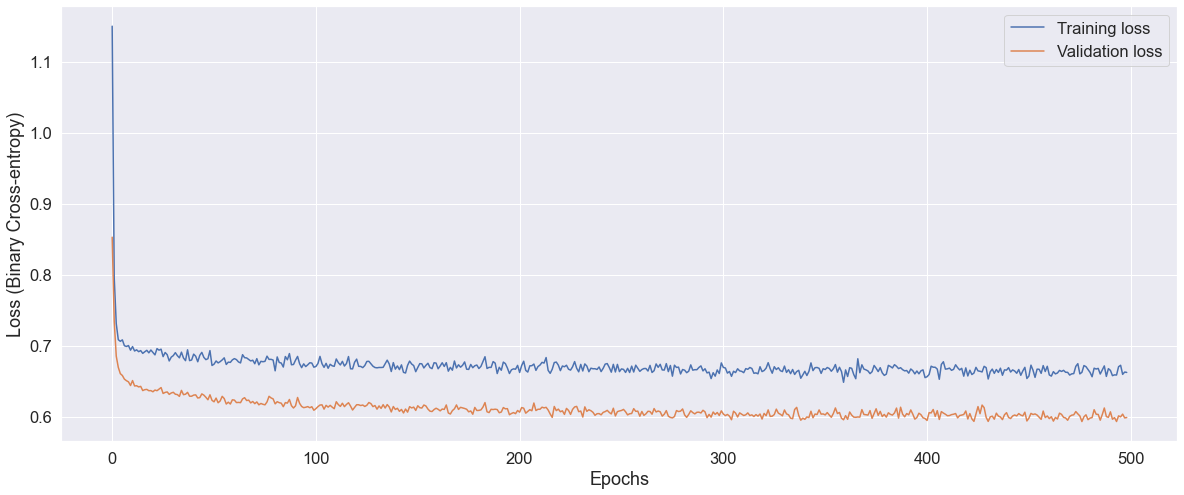

In [78]:
fig = plt.figure(figsize = (20,8))

sns.set(font_scale = 1.5)

plt.plot(range(len(history['loss'][1:])), history['loss'][1:], label = 'Training loss' )

plt.plot(range(len(history['val_loss'][1:])), history['val_loss'][1:], label = 'Validation loss' )

plt.xlabel('Epochs')
plt.ylabel('Loss (Binary Cross-entropy)')
plt.legend()

plt.show()

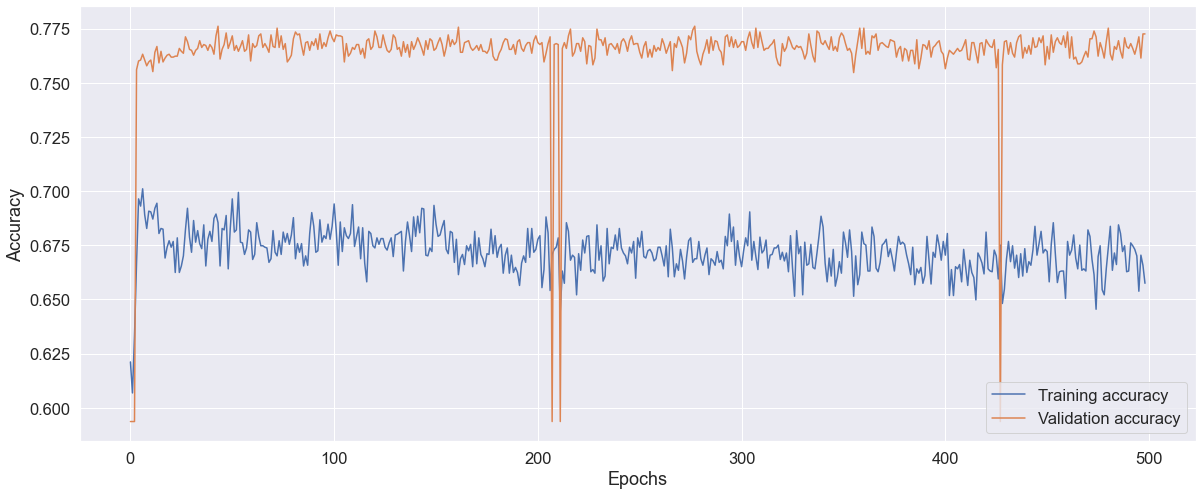

In [79]:
fig = plt.figure(figsize = (20,8))

plt.plot(range(len(history['accuracy'][1:])), history['accuracy'][1:], label = 'Training accuracy' )

plt.plot(range(len(history['val_accuracy'][1:])), history['val_accuracy'][1:], label = 'Validation accuracy' )

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [80]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

predictions = [logmodel_predictions, svcmodel_predictions, forestmodel_predictions, knnmodel_predictions, stackedmodel_predictions, tuned_neural_model_predictions, dummymodel_predictions]

metrics = dict()

metrics['Model'] = ['Logistic Regression', 'Support Vector Machine', 'Random Forest', 'K-Nearest Neighbors', 'Stacked Classifier', 'Neural network', 'Dummy Classifier']

metrics['Test Accuracy'] = [accuracy_score(y_test, pred) for pred in predictions]

metrics['AUC_scores'] = [roc_auc_score(y_test,pred) for pred in predictions]

metrics['Precision'] = [precision_score(y_test,pred) for pred in predictions]

metrics['Recall'] = [recall_score(y_test,pred) for pred in predictions]

metrics['F1-score'] = [f1_score(y_test,pred) for pred in predictions]


In [81]:
metric_df =pd.DataFrame(metrics)

metric_df

,Model,Test Accuracy,AUC_scores,Precision,Recall,F1-score
0,Logistic Regression,0.804726,0.792061,0.805121,0.873457,0.837898
1,Support Vector Machine,0.798038,0.781724,0.789691,0.886574,0.835333
2,Random Forest,0.906821,0.897329,0.889048,0.958333,0.922391
3,K-Nearest Neighbors,0.772626,0.748928,0.753548,0.901235,0.820801
4,Stacked Classifier,0.813642,0.801625,0.813571,0.878858,0.844955
5,Neural network,0.776638,0.759936,0.773572,0.867284,0.817752
6,Dummy Classifier,0.488185,0.475629,0.557187,0.556327,0.556757


## Evaluate a little further with Confusion matrix and Classification report:

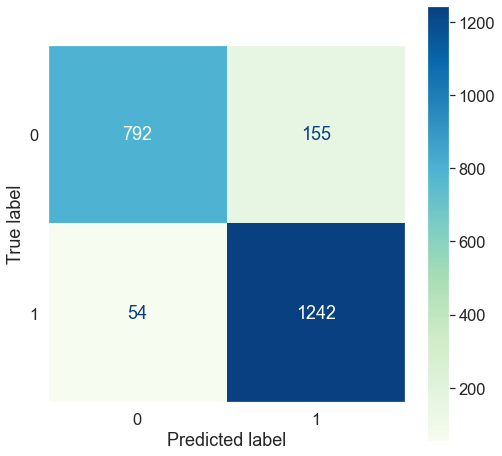

In [82]:
from sklearn.metrics import plot_confusion_matrix, classification_report

fig,ax = plt.subplots(1,1, figsize = (8,8))
ax.grid(False)

plot_confusion_matrix(estimator = forestmodel, X = X_test, y_true = y_test, ax = ax, cmap = 'GnBu')

plt.show()


In [83]:
#View classification report

print(classification_report(y_test,forestmodel_predictions))

              precision    recall  f1-score   support

           0       0.94      0.84      0.88       947
           1       0.89      0.96      0.92      1296

    accuracy                           0.91      2243
   macro avg       0.91      0.90      0.90      2243
weighted avg       0.91      0.91      0.91      2243



# 5. Making a tool to suggest betting odds

Here we aim to make a tool that will take in the names of the two fighters in upcoming fights, then suggest betting odds that would result in a break-even outcome (no profit for the organizer).

In [371]:
#Define a function to predict win probability of the Fighters:

def predict_winner(FighterA, FighterB):
    #Clean df with names 
    clean_withnames = clean_df.join(df[['R_fighter','B_fighter']])

    '''
    Here we get the mean stats for all of Fighter A's fights
    '''
    
    #Entire dfs when Fighter A was red/blue:
    FighterA_asred = clean_withnames[clean_withnames['R_fighter'] == FighterA] 
    FighterA_asblue = clean_withnames[clean_withnames['B_fighter'] == FighterA] 

    #Stats when Fighter A was red/blue: 
    FighterA_red_stats = FighterA_asred[[i for i in FighterA_asred.columns if i.startswith('R_')]]
    FighterA_blue_stats = FighterA_asblue[[i for i in FighterA_asblue.columns if i.startswith('B_')]]

    #Fighter A's mean performance as red/blue
    FighterA_red_stats_mean = FighterA_red_stats.mean()
    FighterA_blue_stats_mean = FighterA_blue_stats.mean()
    
    '''
    Here we get the mean stats for all of Fighter B's fights
    '''
    #Entire df when TM was red
    FighterB_asred = clean_withnames[clean_withnames['R_fighter'] == FighterB] 
    FighterB_asblue = clean_withnames[clean_withnames['B_fighter'] == FighterB] 

    #Stats when Fighter A was red/blue: 
    FighterB_red_stats = FighterB_asred[[i for i in FighterB_asred.columns if i.startswith('R_')]]
    FighterB_blue_stats = FighterB_asblue[[i for i in FighterB_asblue.columns if i.startswith('B_')]]

    #Fighter B's mean performance as red/blue
    FighterB_red_stats_mean = FighterB_red_stats.mean()
    FighterB_blue_stats_mean = FighterB_blue_stats.mean()  
    
    '''
    Here we prepare the data to be inputted into the model
    '''
    
    #Combined dfs for both fighter permutations:
    FighterA_red_FighterB_blue_combined = pd.DataFrame(FighterA_red_stats_mean.append(FighterB_blue_stats_mean)).transpose()
    FighterB_red_FighterA_blue_combined = pd.DataFrame(FighterB_red_stats_mean.append(FighterA_blue_stats_mean)).transpose()
    
    #Get averages for non-fighter specific variables:
    general_averages = pd.DataFrame([clean_df.mean()]).drop(FighterA_red_FighterB_blue_combined.columns, axis = 1)
    
    #Combine fighter and non-fighter specific data:
    final_FighterA_red_FighterB_blue = pd.concat([general_averages,FighterA_red_FighterB_blue_combined], axis = 1)
    final_FighterB_red_FighterA_blue = pd.concat([general_averages,FighterB_red_FighterA_blue_combined], axis = 1)
    
    #Use previously fitted PCA transformer to convert into Principle Components:
    pca_FighterA_red_FighterB_blue = pd.DataFrame(pca.transform(final_FighterA_red_FighterB_blue), 
                      columns = ['Component {}'.format(i+1) for i in range(pca.n_components)])

    pca_FighterB_red_FighterA_blue = pd.DataFrame(pca.transform(final_FighterB_red_FighterA_blue), 
                      columns = ['Component {}'.format(i+1) for i in range(pca.n_components)])
    
    
    #Predict Fighter A's win probability using the Random Forest model when he is Red/Blue :
    
    FighterA_win_probability_whenred = forestmodel.predict_proba(pca_FighterA_red_FighterB_blue)[0][1]
    FighterA_win_probability_whenblue = forestmodel.predict_proba(pca_FighterB_red_FighterA_blue)[0][0]
    
    #Calculate a weighted probability of winning regardless of color:
    
    FighterA_RedFights = len(FighterA_red_stats)
    FighterA_BlueFights = len(FighterA_blue_stats)
    
    FighterA_weighted_win_probability = ((FighterA_win_probability_whenred * FighterA_RedFights) + (FighterA_win_probability_whenblue * FighterA_BlueFights)) / sum([FighterA_RedFights, FighterA_BlueFights])
    
    print('{}\'s probability of winning: {}'.format(FighterA, FighterA_weighted_win_probability))
    print('{}\'s probability of winning: {}'.format(FighterB, 1 - FighterA_weighted_win_probability))
    

In [372]:
predict_winner('Deiveson Figueiredo', 'Brandon Moreno')

Deiveson Figueiredo's probability of winning: 0.5516666666666666
Brandon Moreno's probability of winning: 0.44833333333333336


# Compare results using 1. PCA, 2. PCA + RFE, 3. Normal features

# New Fighter?? How to predict?

In [47]:
#Convert data from pandas dataframes/series into Tensorflow dataset

dataset = tf.data.Dataset.from_tensor_slices((pca_df.values,y.values))

In [48]:
for feat, targ in dataset.take(1):
  print ('Features: {}, Target: {}'.format(feat, targ))

Features: [ 3.38487962e+00  1.47292722e+00  1.44954054e+00  2.99499692e+00
  1.23400204e+00 -2.15347420e+00  1.40653201e-01  1.88015183e+00
 -1.10325051e+00 -2.23952905e+00 -1.22345295e+00  2.01034679e+00
 -6.59577130e-01 -1.58204792e+00 -1.89824028e-01 -1.58234215e+00
  2.45988423e+00  9.28429256e-01 -1.61671125e+00 -1.24981093e+00
  2.87403288e+00 -3.99081117e-01 -7.11831826e-01  5.07670571e-01
  6.65737663e-01  1.19102528e+00  1.12049198e+00  2.90187068e-01
 -1.50426188e+00 -1.06266459e+00  5.49029930e-01 -2.64974902e-01
  1.28237319e-01  1.11577101e+00  6.79054709e-02 -5.12262164e-01
  1.79331259e+00 -9.69912102e-01  2.79967871e-03  2.10246238e-01
  2.89426679e-01  2.31857986e-01 -4.90053090e-01  5.66744894e-02
  8.50261068e-02  1.03162978e-01  4.85164290e-01 -4.81107069e-01
 -5.01387843e-01 -1.10691886e-01  6.38127011e-01 -5.55928083e-01
  2.32745432e-02  8.82512168e-01  9.69462286e-01 -1.09996527e-01], Target: 1
